# Correlation analysis on samples

In this example we are going to estimate the correlation between an output sample Y and the corresponding inputs using various estimators:

- Pearson coefficients
- Spearman coefficients
- PCC: Partial Correlation Coefficients
- PRCC: Partial Rank Correlation Coefficient
- SRC: Standard Regression Coefficients
- SRRC: Standard Rank Regression Coefficient

In [1]:
from __future__ import print_function
import openturns as ot

We define here a `plot` function. It helps to draw correlation coefficients.

Indeed, the correlation coefficients do not necessarly sum to 1. Also they might be negative.
Thus using `pie` plots is of non sense.

In [2]:
def plot_correlation_indices(correlation_indices, input_description, title, legend="Coefficients"):

    dimension = len(input_description)
    graph = ot.Graph(title, "inputs", "coefficient value", True, "")

    # Define cloud
    data = ot.Sample(dimension, 2)
    for k in range(dimension):
        data[k, 0] = k + 1.0
        data[k, 1] = correlation_indices[k]

    cloud = ot.Cloud(data, "red", "circle", legend)
    graph.add(cloud)

    # Set Text Description
    for k in range(dimension):
        data[k, 0] = (k + 1.0) + dimension / 20.0;
        data[k, 1] = 0.5 * correlation_indices[k]
  
    text = ot.Text(data, input_description, "right")
    text.setColor("black")
    graph.add(text)

    # Set bounding box
    lowerBound = [1.0 - dimension / 10.0, -0.1]
    descriptionMargin = 1.6 * (dimension - 1.0) / (dimension + 2.0)
    upperBound = [dimension + descriptionMargin, 1.1]
    graph.setBoundingBox(ot.Interval(lowerBound, upperBound))

    graph.setLegendPosition("topright")
    return graph;

To illustrate the usage of the method mentionned above, we define a set of X/Y data using the ususal `Ishigami` use-case.

In [3]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
formula = ['X3+sin(pi_*X1)+7*sin(X2)*sin(pi_*X2)+' + \
           '1.2*((pi_*X3)*(pi_*X2))*sin(pi_*X1)']
input_names = ['X1', 'X2', 'X3']
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3, \
                                        ot.IndependentCopula(3))
size = 100
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

PCC coefficients
------------------
We compute here `PCC` coefficients using the `CorrelationAnalysis`

In [4]:
pcc_indices = ot.CorrelationAnalysis.PCC(inputDesign, outputDesign)
print(pcc_indices)

[0.195052,0.0183082,0.171376]


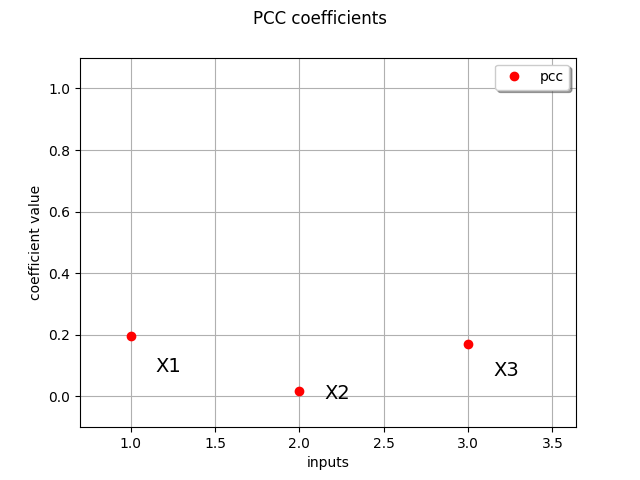

In [5]:
plot_correlation_indices(pcc_indices, input_names, "PCC coefficients", "pcc")

PRCC coefficients
--------------------
We compute here `PRCC` coefficients using the `CorrelationAnalysis`

In [6]:
prcc_indices = ot.CorrelationAnalysis.PRCC(inputDesign, outputDesign)
print(prcc_indices)

[0.218657,0.00540221,0.14355]


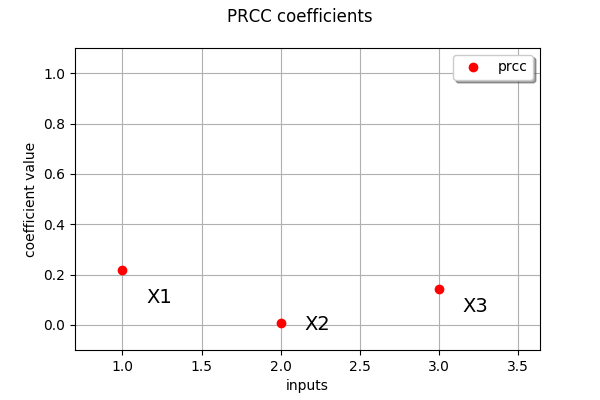

In [7]:
plot_correlation_indices(prcc_indices, input_names, "PRCC coefficients", "prcc")

SRC coefficients
-------------------
We compute here `SRC` coefficients using the `CorrelationAnalysis`

In [8]:
src_indices = ot.CorrelationAnalysis.SRC(inputDesign, outputDesign)
print(src_indices)

[0.563513,0.00478466,0.431703]


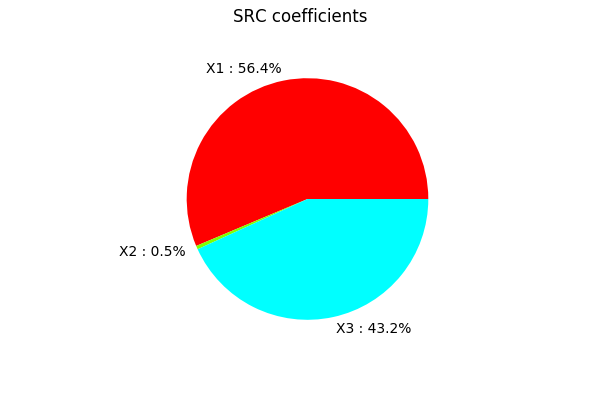

In [9]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(src_indices, input_names, 'SRC coefficients')

SRRC coefficients
--------------------
We compute here `SRRC` coefficients using the `CorrelationAnalysis`

In [10]:
srrc_indices = ot.CorrelationAnalysis.SRRC(inputDesign, outputDesign)
print(srrc_indices)

[0.704098,0.000409932,0.295492]


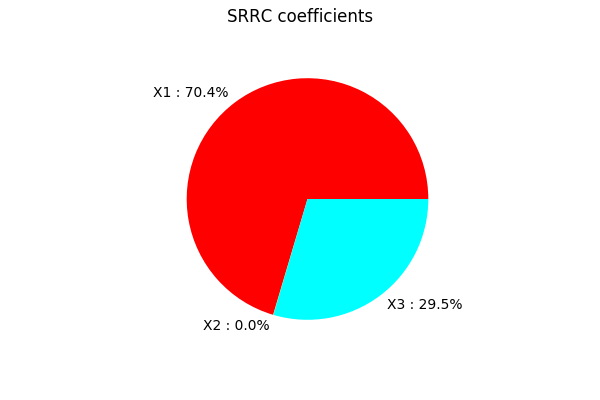

In [11]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(srrc_indices, input_names, 'SRRC coefficients')

Pearson coefficients
-----------------------
We compute here the Pearson $\rho$ coefficients using the `CorrelationAnalysis`

In [12]:
pearson_correlation = ot.CorrelationAnalysis.PearsonCorrelation(inputDesign, outputDesign)
print(pearson_correlation)

[0.194078,0.0210564,0.171476]


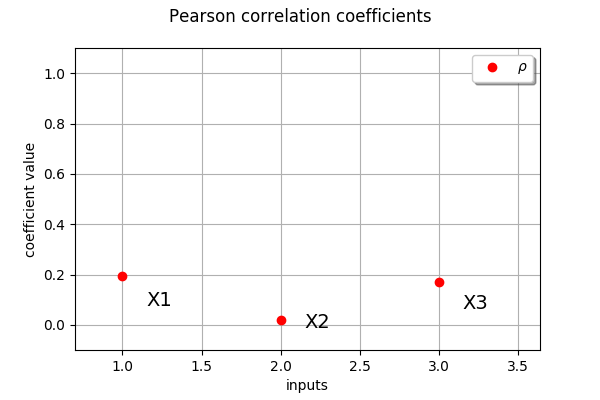

In [13]:
plot_correlation_indices(pearson_correlation, input_names, "Pearson correlation coefficients", r"$\rho$")

Spearman coefficients
-----------------------
We compute here the Pearson $\rho_s$ coefficients using the `CorrelationAnalysis`

In [14]:
spearman_correlation = ot.CorrelationAnalysis.SpearmanCorrelation(inputDesign, outputDesign)
print(spearman_correlation)

[0.218318,0.00733303,0.143473]


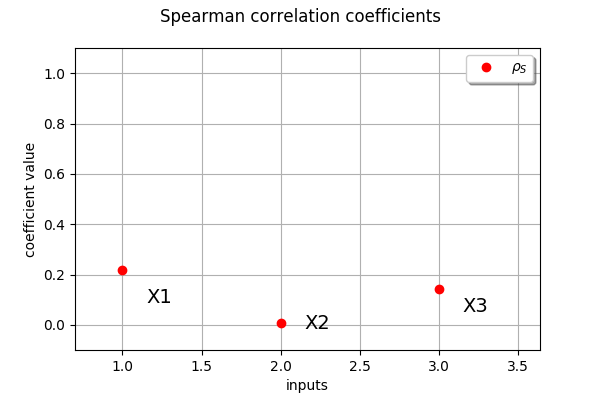

In [15]:
plot_correlation_indices(spearman_correlation, input_names, "Spearman correlation coefficients", r"$\rho_S$")